# 1. Getting Started: Airbnb Copenhagen

This assignment deals with the most recent Airbnb listings in Copenhagen. The data is collected from [Inside Airbnb](http://insideairbnb.com/copenhagen). Feel free to explore the website further in order to better understand the data. The data (*listings.csv*) has been collected as raw data and needs to be preprocessed.

**Hand-in:** Hand in as a group in Itslearning in a **single**, well-organized and easy-to-read Jupyter Notebook. Please just use this notebook to complete the assignment.

If your group consists of students from different classes, upload in **both** classes.

The first cell does some preprocessing. Please just run these cells and do not change anything. The assignment starts below. Make sure that listings.csv' is in the same folder as this notebook




<>:55: SyntaxWarning: invalid escape sequence '\$'
<>:55: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipykernel_6004/1842324635.py:55: SyntaxWarning: invalid escape sequence '\$'
  data_filtered['price'] = data_filtered['price'].replace('[\$,]', '', regex=True).astype(float)


,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365,price_category
0,6983,Copenhagen 'N Livin',16774,Simon,Nørrebro,55.686410,12.547410,Entire home/apt,898.0,3,...,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0,0
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,2600.0,4,...,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303,1
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,3250.0,3,...,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56,1
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,725.0,7,...,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59,0
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,1954.0,3,...,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0,1


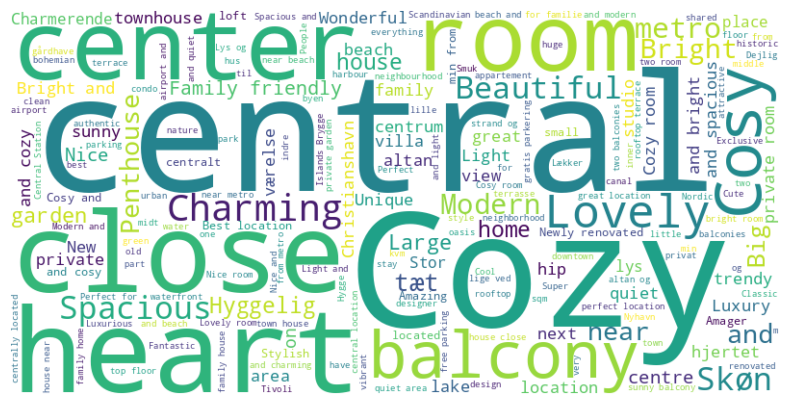

In [69]:
# pip install pandas
# pip install scikit-learn
import pandas as pd
import sklearn as sk

# load the data
data = pd.read_csv('listings.csv')

# filter relevant columns
data_limited = data[["id",
    "name",
    "host_id"  ,
    "host_name" , 
    "neighbourhood_cleansed"  ,
    "latitude"  ,
    "longitude"  ,
    "room_type"  ,
    "price"  ,
    "minimum_nights"  ,
    "number_of_reviews",  
    "last_review"  ,
    "review_scores_rating"  ,
    "review_scores_accuracy" , 
    "review_scores_cleanliness"  ,
    "review_scores_checkin"  ,
    "review_scores_communication"  ,
    "review_scores_location"  ,
    "review_scores_value"  ,
    "reviews_per_month"  ,
    "calculated_host_listings_count"  ,
    "availability_365",]]

# removing rows with no reviews

data_filtered = data_limited.loc[data_limited['number_of_reviews'] != 0]

# remove nan

data_filtered = data_filtered.dropna()
data_filtered.head()

# get a list of distinct values from neighbourhood_cleansed columns in data_filtered

neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# replace e.g. Nrrbro with Nørrebro in neighbourhood_cleansed column

data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Nrrebro", "Nørrebro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("sterbro", "Østerbro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Vanlse", "Vanløse")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Brnshj-Husum", "Brønshøj-Husum")
neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# Remove dollar signs and commas and convert to float - note the prices are actually in DKK
data_filtered['price'] = data_filtered['price'].replace('[\$,]', '', regex=True).astype(float)

# Calculate the median price
median_price = data_filtered['price'].median()

# Create a new column 'price_category' with 0 for 'affordable' and 1 for 'expensive'
data_filtered['price_category'] = (data_filtered['price'] > median_price).astype(int)

display(data_filtered.head())

# Describe the apartments using a wordcloud
# Remember to install packages
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine the two lists of stop words
stop_words = ['Østerbro', 'Copenhagen', 'København', 'in', 'bedroom', 'bedrooms', 'bed', 'beds', 'bath', 'baths', 'Frederiksberg', 'V', 'Ø', 'SV', 'S', 'N', 'K', 'C', 'W', 'kbh', 'Ballerup', 'Hellerup', 'Valby', 'Vanløse', 'Brønhøj', 'Nørrebro', 'Vesterbro', "CPH", "with", "to", "of", "a", "the", "på", "i", "med", "af", "at", "city", "by", "apartment", "appartment", "lejlighed", "flat", "m2", "apt"]

# Convert the 'name' column to a single string
text = ' '.join(data_filtered['name'].astype(str))

# Create and generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Your tasks start here


### 1. Since data science is so much fun, provide a word cloud of the names of the hosts, removing any names of non-persons. Does this more or less correspond with the distribution of names according to [Danmarks Statistik](https://www.dst.dk/da/Statistik/emner/borgere/navne/navne-i-hele-befolkningen)?

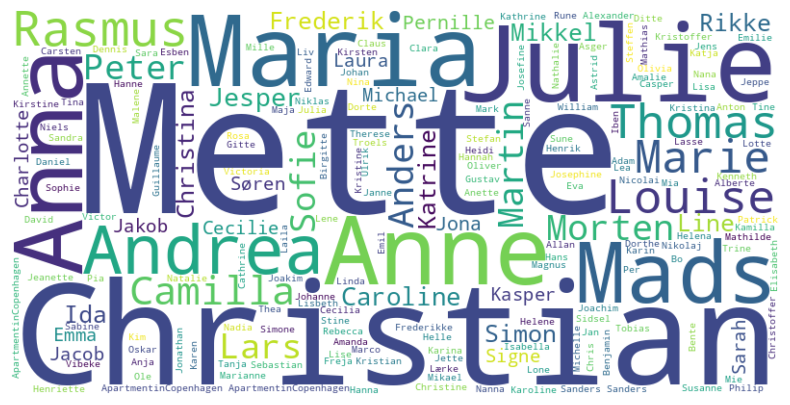

In [70]:
# Filter out non-person names
person_names = data_filtered[data_filtered['host_name'].str.isalpha()]['host_name']

# Convert the 'host_name' column to a single string
text = ' '.join(person_names.astype(str))

# Create and generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 2. Using non-scaled versions of latitude and longitude, plot the listings data on a map.

In [71]:
import folium

# State your solution here. Add more cells if needed.
# Create a map centered around Copenhagen
map = folium.Map(location=[55.6761, 12.5683], zoom_start=13)

coordinates_table = data[["id",
    "name",
    "latitude"  ,
    "longitude"]]

for index, row in coordinates_table.head(1000).iterrows():
    folium.Marker([row['latitude'], row['longitude']]).add_to(map)
    
# Limiting the output to the first 1000 rows for performance reasons (VS Code can't handle more)

map

### 3. Create boxplots where you have the neighbourhood on the x-axis and price on the y-axis. What does this tell you about the listings in Copenhagen? Keep the x-axis as is and move different variables into the y-axis to see how things are distributed between the neighborhoods to create different plots (your choice).

/tmp/ipykernel_6004/3463591706.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="price", y="neighbourhood_cleansed", whis=[0, 100], width=.6, palette="vlag")


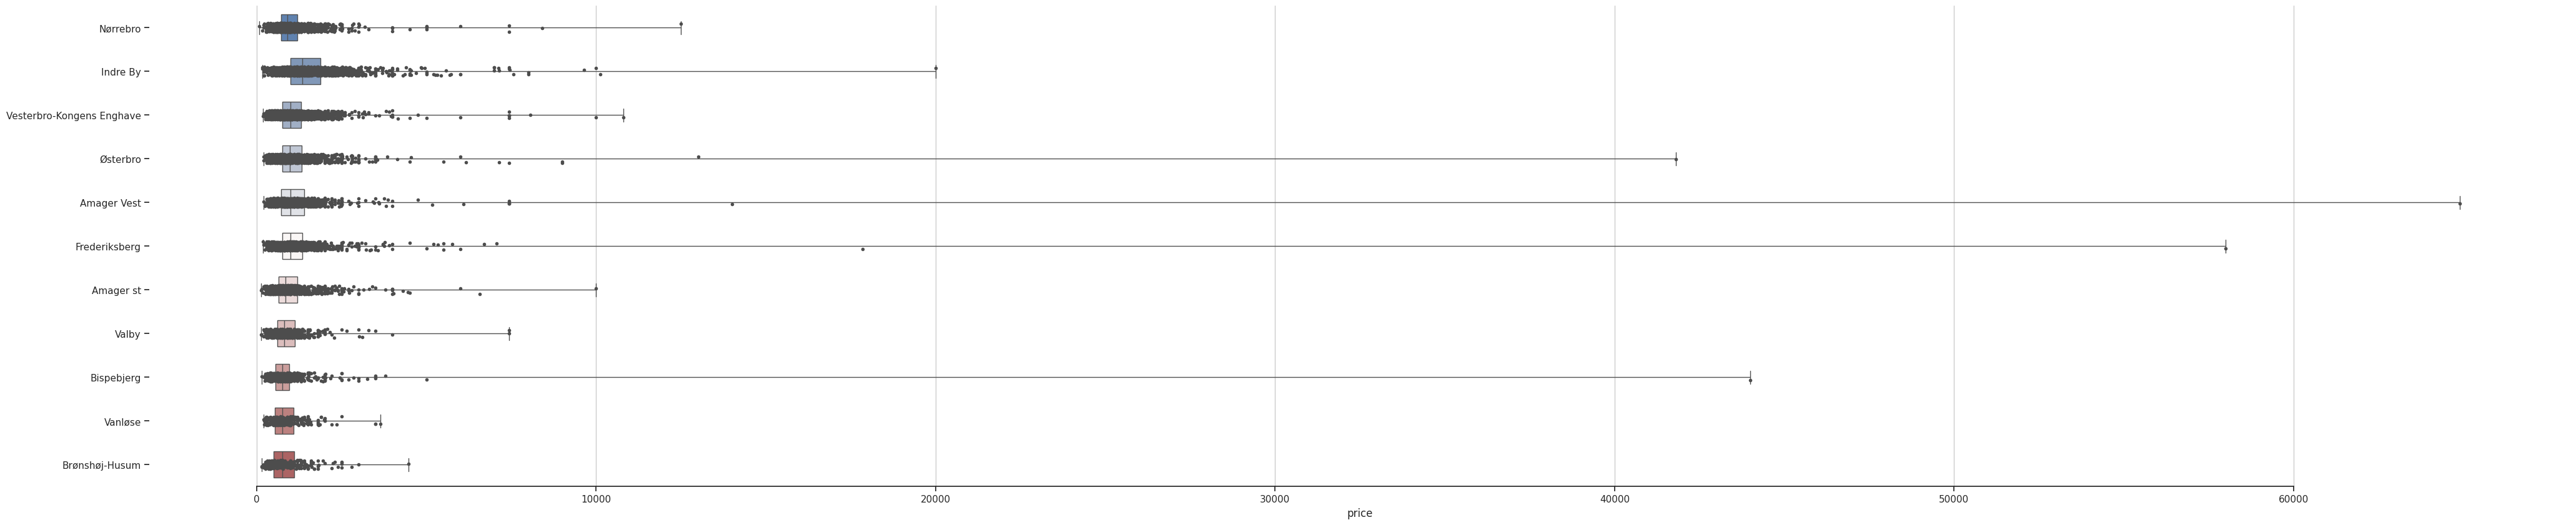

In [72]:
# State your solution here. Add more cells if needed.
import seaborn as sns
import matplotlib.pyplot as plt

data = data_filtered[["neighbourhood_cleansed", "price"]]
# Create boxplotsimport seaborn as sns

sns.set_theme(style="ticks")




f, ax = plt.subplots(figsize=(50, 10))

# Plot the orbital period with horizontal boxes
sns.boxplot(data=data, x="price", y="neighbourhood_cleansed", whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(data, x="price", y="neighbourhood_cleansed", size=4, color=".3")

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

### 4. Do a descriptive analysis of the neighborhoods. Include information about room type in the analysis as well as one other self-chosen feature. The descriptive analysis should contain mean/average, mode, median, standard deviation/variance, minimum, maximum and quartiles.

In [73]:
descriptive_analysis = data_filtered.groupby(['neighbourhood_cleansed', 'room_type']).agg({
    'price': ['mean', 'median', 'std', 'min', 'max'],
    'reviews_per_month': ['mean', 'median', 'std', 'min', 'max']
})

descriptive_analysis



price                       \
                                                  mean  median          std   
neighbourhood_cleansed    room_type                                           
Amager Vest               Entire home/apt  1234.226623  1050.0   832.696891   
                          Private room     1032.966216   500.0  5299.018095   
                          Shared room      1051.500000  1051.5   112.429978   
Amager st                 Entire home/apt  1093.584071   900.0   721.982284   
                          Hotel room       1296.000000  1201.0   211.184753   
                          Private room      549.325581   471.0   293.995992   
                          Shared room      2575.000000  2575.0          NaN   
Bispebjerg                Entire home/apt   992.592520   800.0  1981.580545   
                          Private room      488.978947   400.0   353.674089   
                          Shared room       198.000000   198.0          NaN   
Brønshøj-Husum            Entire home/apt  1014.995370   900.0   555.669548   
                          Private room      445.552239   400.0   201.631624   
                          Shared room       211.500000   211.5    16.263456   
Frederiksberg             Entire home/apt  1292.472222  1037.0  1958.802772   
                          Private room      621.706767   500.0   567.611220   
Indre By                  Entire home/apt  1642.387192  1400.0  1072.616232   
                          Hotel room       1077.200000  1306.0   654.255098   
                          Private room      698.984375   582.0   380.070466   
                          Shared room       292.000000   280.0    67.577116   
Nørrebro                  Entire home/apt  1047.742192   950.0   583.703218   
                          Private room      650.121212   500.0   760.270040   
                          Shared room       324.666667   400.0   130.481161   
Valby                     Entire home/apt  1017.968889   899.0   635.434691   
                          Private room      498.157303   438.0   288.616366   
Vanløse                   Entire home/apt   954.425197   826.5   496.658320   
                          Private room      413.409091   337.5   194.578652   
Vesterbro-Kongens Enghave Entire home/apt  1181.435119  1000.0   698.122481   
                          Private room      574.366516   500.0   295.726896   
                          Shared room       330.500000   330.5   113.844192   
Østerbro                  Entire home/apt  1248.551107  1000.0  1438.908216   
                          Private room      605.461538   500.0   437.259030   
                          Shared room       469.000000   469.0          NaN   

                                                           reviews_per_month  \
                                              min      max              mean   
neighbourhood_cleansed    room_type                                            
Amager Vest               Entire home/apt   250.0  14000.0          0.800539   
                          Private room      200.0  64900.0          1.439459   
                          Shared room       972.0   1131.0          0.010000   
Amager st                 Entire home/apt   240.0  10000.0          0.893489   
                          Hotel room       1149.0   1538.0          0.346667   
                          Private room      135.0   2000.0          1.783023   
                          Shared room      2575.0   2575.0          0.040000   
Bispebjerg                Entire home/apt   235.0  44000.0          0.800276   
                          Private room      143.0   3000.0          1.323263   
                          Shared room       198.0    198.0         15.740000   
Brønshøj-Husum            Entire home/apt   250.0   4462.0          0.679120   
                          Private room      145.0   1200.0          1.268358   
                          Shared room       200.0    223.0          0.925000   
Fre

### 5. Based on self-chosen features, develop three different regression models that can predict the price of a rental property. Remember to divide your data into training data and test data. Comment on your findings.

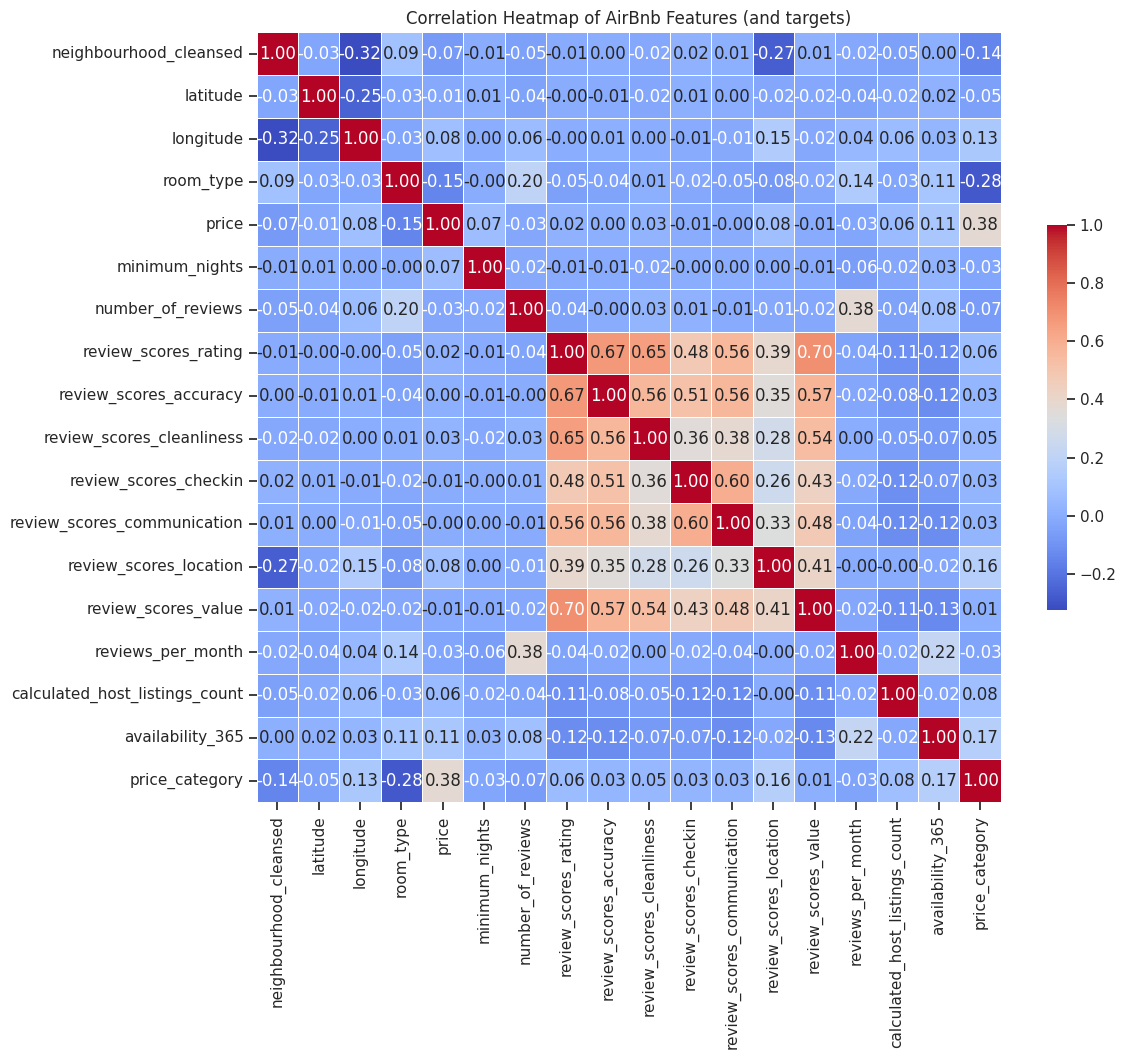

'Absolute correlation values to price'

price                             1.000000
price_category                    0.375049
room_type                         0.145561
availability_365                  0.112570
review_scores_location            0.076005
longitude                         0.075408
neighbourhood_cleansed            0.074526
minimum_nights                    0.068311
calculated_host_listings_count    0.055396
reviews_per_month                 0.031530
number_of_reviews                 0.026989
review_scores_cleanliness         0.026803
review_scores_rating              0.015634
latitude                          0.014144
review_scores_value               0.008720
review_scores_checkin             0.006129
review_scores_accuracy            0.004699
review_scores_communication       0.003418
Name: price, dtype: float64

In [74]:
adapted_data = data_filtered.drop(["id", "name", "host_id", "host_name", "last_review"], axis='columns')

adapted_data = adapted_data.dropna()

neighbourhood_mapping = {neighbourhood: index for index, neighbourhood in enumerate(neighbourhoods)}
adapted_data['neighbourhood_cleansed'] = adapted_data['neighbourhood_cleansed'].map(neighbourhood_mapping)

# map room types to integers (Correlation works with numerical values)
rooms = adapted_data["room_type"].unique()
room_mapping = {room: index for index, room in enumerate(rooms)}
adapted_data["room_type"] = adapted_data["room_type"].map(room_mapping)

# Calling the pandas built-in correlation method
corr = adapted_data.corr()

# init a matplotlib figure for displaying
plt.figure(figsize=(12, 10))

# use seaborn for a neat heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', 
            xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.5, cbar_kws={'shrink': .5})

# we can also add a title
plt.title('Correlation Heatmap of AirBnb Features (and targets)')

plt.show()

# Display the absolute correlation values to price (The higher the better)
display('Absolute correlation values to price')
corr["price"].abs().sort_values(ascending=False)

In [75]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Dividing the data into features and target
X = adapted_data.drop(["price"], axis=1)
Y = adapted_data["price"]

# Subselect for choosen features
# The features which have the highest absolute orrelation
X_OLS = X[['price_category', 'room_type', 'availability_365']].copy()

# split the data into training and testing sets (we use the same random state to keep the same X->y relation)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)
X_OLS_train, X_OLS_test = train_test_split(X_OLS, test_size=0.2, random_state=7)

# scale the features to z values
# (remember, regression can be sensitive to unnormalized variables, i.e. differences in ranges of the values)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # notice we fit the scaler to the training data
X_test_scaled = scaler.transform(X_test) # and then we apply the fitted scaler to the test data
                                         # we MUST NOT learn from the test data, not even scales

# scale the OLS features separately
OLS_scaler = StandardScaler()
X_OLS_train_scaled = OLS_scaler.fit_transform(X_OLS_train)
X_OLS_test_scaled = OLS_scaler.transform(X_OLS_test)

# fit the OLS model
ols_model = LinearRegression()
ols_model.fit(X_OLS_train_scaled, y_train)

# fit the ridge regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

# fit the lasso regression model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)

# predict training data to compare with predictions on test data (learned data vs. unseen data)
ols_train_pred = ols_model.predict(X_OLS_train_scaled)
ridge_train_pred = ridge_model.predict(X_train_scaled)
lasso_train_pred = lasso_model.predict(X_train_scaled)

# predict test data
ols_test_pred = ols_model.predict(X_OLS_test_scaled)
ridge_test_pred = ridge_model.predict(X_test_scaled)
lasso_test_pred = lasso_model.predict(X_test_scaled)

# evaluate training error using MSE
ols_train_mse = mean_squared_error(y_train, ols_train_pred)
ridge_train_mse = mean_squared_error(y_train, ridge_train_pred)
lasso_train_mse = mean_squared_error(y_train, lasso_train_pred)

# evaluate test error using MSE
ols_test_mse = mean_squared_error(y_test, ols_test_pred)
ridge_test_mse = mean_squared_error(y_test, ridge_test_pred)
lasso_test_mse = mean_squared_error(y_test, lasso_test_pred)

# evaluate training R²
ols_train_r2 = r2_score(y_train, ols_train_pred)
ridge_train_r2 = r2_score(y_train, ridge_train_pred)
lasso_train_r2 = r2_score(y_train, lasso_train_pred)

# evaluate test R²
ols_test_r2 = r2_score(y_test, ols_test_pred)
ridge_test_r2 = r2_score(y_test, ridge_test_pred)
lasso_test_r2 = r2_score(y_test, lasso_test_pred)

# print stats
print("OLS Mean Squared Error (train / test):", ols_train_mse, "/", ols_test_mse)
print("Ridge Mean Squared Error (train / test):", ridge_train_mse, "/", ridge_test_mse)
print("Lasso Mean Squared Error (train / test):", lasso_train_mse, "/", lasso_test_mse)
print("")
print("OLS R² (train / test):", ols_train_r2, "/", ols_test_r2)
print("Ridge R² (train / test):", ridge_train_r2, "/", ridge_test_r2)
print("Lasso R² (train / test):", lasso_train_r2, "/", lasso_test_r2)

display("Even when using the most correlated features, the models are not very good. This is likely due to the fact that the features are not very correlated with the price. The models are not able to learn much from the data.")

OLS Mean Squared Error (train / test): 1364763.1103180407 / 1072954.5180261843
Ridge Mean Squared Error (train / test): 1344912.605046064 / 1086606.7130324745
Lasso Mean Squared Error (train / test): 1344912.8378170854 / 1086556.2963766998

OLS R² (train / test): 0.1407917529576439 / 0.16982994576604205
Ridge R² (train / test): 0.15328895317407243 / 0.15926692256387132
Lasso R² (train / test): 0.1532888066293865 / 0.15930593111190894


'Even when using the most correlated features, the models are not very good. This is likely due to the fact that the features are not very correlated with the price. The models are not able to learn much from the data.'